# Bayesian Network

### Prereq

In [2]:
%matplotlib inline
import matplotlib as matplt
import seaborn as sb
import numpy as np 
from pomegranate import *

sb.set_style("whitegrid")
np.random.seed(0)
np.set_printoptions(suppress=True)
%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.23.5
scipy      : 1.10.1
pomegranate: 0.14.4

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.0-69-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



### Network

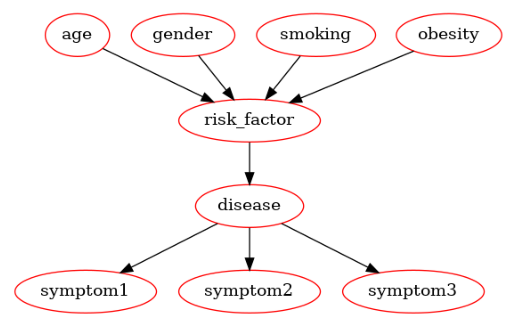

In [26]:
# Nodes
age = DiscreteDistribution({"young": 0.5, "old": 0.5})
gender = DiscreteDistribution({"male": 0.5, "female": 0.5})
smoking = DiscreteDistribution({"smoker": 0.3, "non-smoker": 0.7})
obesity = DiscreteDistribution({"obese": 0.4, "non-obese": 0.6})

risk_factor = ConditionalProbabilityTable(
    [
        ["young", "male", "smoker", "obese", "high", 0.8],
        ["young", "male", "smoker", "non-obese", "high", 0.7],
        ["young", "male", "non-smoker", "obese", "high", 0.6],
        ["young", "male", "non-smoker", "non-obese", "high", 0.2],
        ["young", "female", "smoker", "obese", "high", 0.7],
        ["young", "female", "smoker", "non-obese", "high", 0.6],
        ["young", "female", "non-smoker", "obese", "high", 0.5],
        ["young", "female", "non-smoker", "non-obese", "high", 0.1],
        ["old", "male", "smoker", "obese", "high", 0.9],
        ["old", "male", "smoker", "non-obese", "high", 0.8],
        ["old", "male", "non-smoker", "obese", "high", 0.7],
        ["old", "male", "non-smoker", "non-obese", "high", 0.4],
        ["old", "female", "smoker", "obese", "high", 0.8],
        ["old", "female", "smoker", "non-obese", "high", 0.7],
        ["old", "female", "non-smoker", "obese", "high", 0.6],
        ["old", "female", "non-smoker", "non-obese", "high", 0.3],
    ],
    [age, gender, smoking, obesity],
)

disease = ConditionalProbabilityTable(
    [
        ["high", "disease", 0.9],
        ["high", "no_disease", 0.1]
    ],
    [risk_factor],
)

symptom1 = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.8], 
        ["disease", "absent", 0.2],
        ["no_disease", "present", 0.2], 
        ["no_disease", "absent", 0.8],
    ], 
    [disease]
)
symptom2 = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.7],
        ["disease", "absent", 0.3],
        ["no_disease", "present", 0.3],
        ["no_disease", "absent", 0.7],
    ],
    [disease]
)
symptom3 = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.6],
        ["disease", "absent", 0.4],
        ["no_disease", "present", 0.4],
        ["no_disease", "absent", 0.6],
    ],
    [disease]
)

# States
s1 = State(age, name="age")
s2 = State(gender, name="gender")
s3 = State(smoking, name="smoking")
s4 = State(obesity, name="obesity")
s5 = State(risk_factor, name="risk_factor")
s6 = State(disease, name="disease")
s7 = State(symptom1, name="symptom1")
s8 = State(symptom2, name="symptom2")
s9 = State(symptom3, name="symptom3")

# Create the Bayesian network
model = BayesianNetwork("Medical Disease Diagnosis")

# Add states
model.add_states(s1, s2, s3, s4, s5, s6, s7, s8, s9)

# Add edges
model.add_edge(s1, s5)
model.add_edge(s2, s5)
model.add_edge(s3, s5)
model.add_edge(s4, s5)
model.add_edge(s5, s6)
model.add_edge(s6, s7)
model.add_edge(s6, s8)
model.add_edge(s6, s9)

# Finalize the model
model.bake()
model.plot()

In [27]:
observations = {
    "age": "old",
    "gender": "male",
    "smoking": "smoker",
    "obesity": "obese",
    "symptom1": "present",
    "symptom2": "present",
    "symptom3": "absent",
}

belief = model.predict_proba(observations)
belief = map(str, belief)
print("Beliefs:\n", "\n".join("{}\t{}".format(state.name, belief) for state, belief in zip(model.states, belief)))

Beliefs:
 age	old
gender	male
smoking	smoker
obesity	obese
risk_factor	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "high" : 1.0
        }
    ],
    "frozen" : false
}
disease	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "disease" : 0.9824561403508766,
            "no_disease" : 0.017543859649123365
        }
    ],
    "frozen" : false
}
symptom1	present
symptom2	present
symptom3	absent


In [28]:
risk_factor

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "young",
            "male",
            "smoker",
            "obese",
            "high",
            "0.8"
        ],
        [
            "young",
            "male",
            "smoker",
            "non-obese",
            "high",
            "0.7"
        ],
        [
            "young",
            "male",
            "non-smoker",
            "obese",
            "high",
            "0.6"
        ],
        [
            "young",
            "male",
            "non-smoker",
            "non-obese",
            "high",
            "0.2"
        ],
        [
            "young",
            "female",
            "smoker",
            "obese",
            "high",
            "0.7"
        ],
        [
            "young",
            "female",
            "smoker",
            "non-obese",
            "high",
            "0.6"
        ],
        [
            "you

In [30]:
model.probability(np.array(["young", "male", "smoker", "obese", None, None, None, None, None], ndmin=2))

0.03

In [31]:
model.probability(np.array([None, None, "smoker", "obese", None, None,"present", None, None], ndmin=2))

0.12000000000000001

In [32]:
model.predict_proba(np.array([None, None, "smoker", "obese", None, None,"present", None, None], ndmin=2))

[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "young" : 0.46875000000000006,
                    "old" : 0.53125
                }
            ],
            "frozen" : false
        }                                         ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "male" : 0.53125,
                    "female" : 0.46875000000000006
                }
            ],
            "frozen" : false
        }                                         , 'smoker', 'obese',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "high" : 1.0
                }
            ],
    

In [33]:
model.predict_proba({"age": "young", "gender": "male"})

array(['young', 'male', {
                            "class" : "Distribution",
                            "dtype" : "str",
                            "name" : "DiscreteDistribution",
                            "parameters" : [
                                {
                                    "smoker" : 0.46835443037974694,
                                    "non-smoker" : 0.531645569620253
                                }
                            ],
                            "frozen" : false
                        }                                           ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "obese" : 0.5569620253164558,
                   "non-obese" : 0.4430379746835443
               }
           ],
           "frozen" : false
       }                                           ,
       {
           "class" : "Distributio

In [34]:
model.predict_proba({"symptom1": "present", "symptom2": "present"})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "young" : 0.4282828282828284,
                   "old" : 0.5717171717171716
               }
           ],
           "frozen" : false
       }                                        ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "male" : 0.5505050505050504,
                   "female" : 0.44949494949494956
               }
           ],
           "frozen" : false
       }                                         ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "smoker" : 0.44848484848484854,
                   "non-smoker" : 0.551515151515